# Сессия 2

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Настройки пандаса

In [2]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
df = pd.read_csv("df.csv",index_col=0)

Проверка нет ли повторяющихся строк

In [4]:
df.duplicated().value_counts()

False    7900
dtype: int64

Подсчет нулл значений и визуализация

In [5]:
df.describe().append(df.isnull().sum().rename("null"))

,ID,Temp_first_val,Temp_last_val,Temp_min,Temp_max,Temp_mean,Temp_median,FiO2_first_val,FiO2_last_val,FiO2_min,FiO2_max,FiO2_mean,FiO2_median,Albumin_first_val,Albumin_last_val,Albumin_min,Albumin_max,Albumin_mean,Albumin_median,Urine_first_val,Urine_last_val,Urine_min,Urine_max,Urine_mean,Urine_median,NIDiasABP_first_val,NIDiasABP_last_val,NIDiasABP_min,NIDiasABP_max,NIDiasABP_mean,NIDiasABP_median,WBC_first_val,WBC_last_val,WBC_min,WBC_max,WBC_mean,WBC_median,DiasABP_first_val,DiasABP_last_val,DiasABP_min,DiasABP_max,DiasABP_mean,DiasABP_median,HCO3_first_val,HCO3_last_val,HCO3_min,HCO3_max,HCO3_mean,HCO3_median,SysABP_first_val,SysABP_last_val,SysABP_min,SysABP_max,SysABP_mean,SysABP_median,Glucose_first_val,Glucose_last_val,Glucose_min,Glucose_max,Glucose_mean,Glucose_median,Lactate_first_val,Lactate_last_val,Lactate_min,Lactate_max,Lactate_mean,Lactate_median,TroponinT_first_val,TroponinT_last_val,TroponinT_min,TroponinT_max,TroponinT_mean,TroponinT_median,NISysABP_first_val,NISysABP_last_val,NISysABP_min,NISysABP_max,NISysABP_mean,NISysABP_median,Creatinine_first_val,Creatinine_last_val,Creatinine_min,Creatinine_max,Creatinine_mean,Creatinine_median,Bilirubin_first_val,Bilirubin_last_val,Bilirubin_min,Bilirubin_max,Bilirubin_mean,Bilirubin_median,ALP_first_val,ALP_last_val,ALP_min,ALP_max,ALP_mean,ALP_median,MechVent_first_val,MechVent_last_val,MechVent_min,MechVent_max,MechVent_mean,MechVent_median,Cholesterol_first_val,Cholesterol_last_val,Cholesterol_min,Cholesterol_max,Cholesterol_mean,Cholesterol_median,MAP_first_val,MAP_last_val,MAP_min,MAP_max,MAP_mean,MAP_median,Mg_first_val,Mg_last_val,Mg_min,Mg_max,Mg_mean,Mg_median,TroponinI_first_val,TroponinI_last_val,TroponinI_min,TroponinI_max,TroponinI_mean,TroponinI_median,GCS_first_val,GCS_last_val,GCS_min,GCS_max,GCS_mean,GCS_median,K_first_val,K_last_val,K_min,K_max,K_mean,K_median,PaO2_first_val,PaO2_last_val,PaO2_min,PaO2_max,PaO2_mean,PaO2_median,pH_first_val,pH_last_val,pH_min,pH_max,pH_mean,pH_median,PaCO2_first_val,PaCO2_last_val,PaCO2_min,PaCO2_max,PaCO2_mean,PaCO2_median,SaO2_first_val,SaO2_last_val,SaO2_min,SaO2_max,SaO2_mean,SaO2_median,Na_first_val,Na_last_val,Na_min,Na_max,Na_mean,Na_median,ALT_first_val,ALT_last_val,ALT_min,ALT_max,ALT_mean,ALT_median,AST_first_val,AST_last_val,AST_min,AST_max,AST_mean,AST_median,NIMAP_first_val,NIMAP_last_val,NIMAP_min,NIMAP_max,NIMAP_mean,NIMAP_median,HR_first_val,HR_last_val,HR_min,HR_max,HR_mean,HR_median,RespRate_first_val,RespRate_last_val,RespRate_min,RespRate_max,RespRate_mean,RespRate_median,BUN_first_val,BUN_last_val,BUN_min,BUN_max,BUN_mean,BUN_median,Platelets_first_val,Platelets_last_val,Platelets_min,Platelets_max,Platelets_mean,Platelets_median,HCT_first_val,HCT_last_val,HCT_min,HCT_max,HCT_mean,HCT_median,ICUType_first_val,ICUType_last_val,ICUType_min,ICUType_max,ICUType_mean,ICUType_median,Gender,Height,Age,Weight
count,7900.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,5352.000000,5352.000000,5352.000000,5352.000000,5352.000000,5352.00000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,7762.000000,7762.000000,7762.000000,7762.000000,7762.000000,7762.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,7764.000000,7764.000000,7764.00000,7764.000000,7764.000000,7764.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,7701.000000,7701.000000,7701.000000,7701.000000,7701.000000,7701.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3350.000000,3350

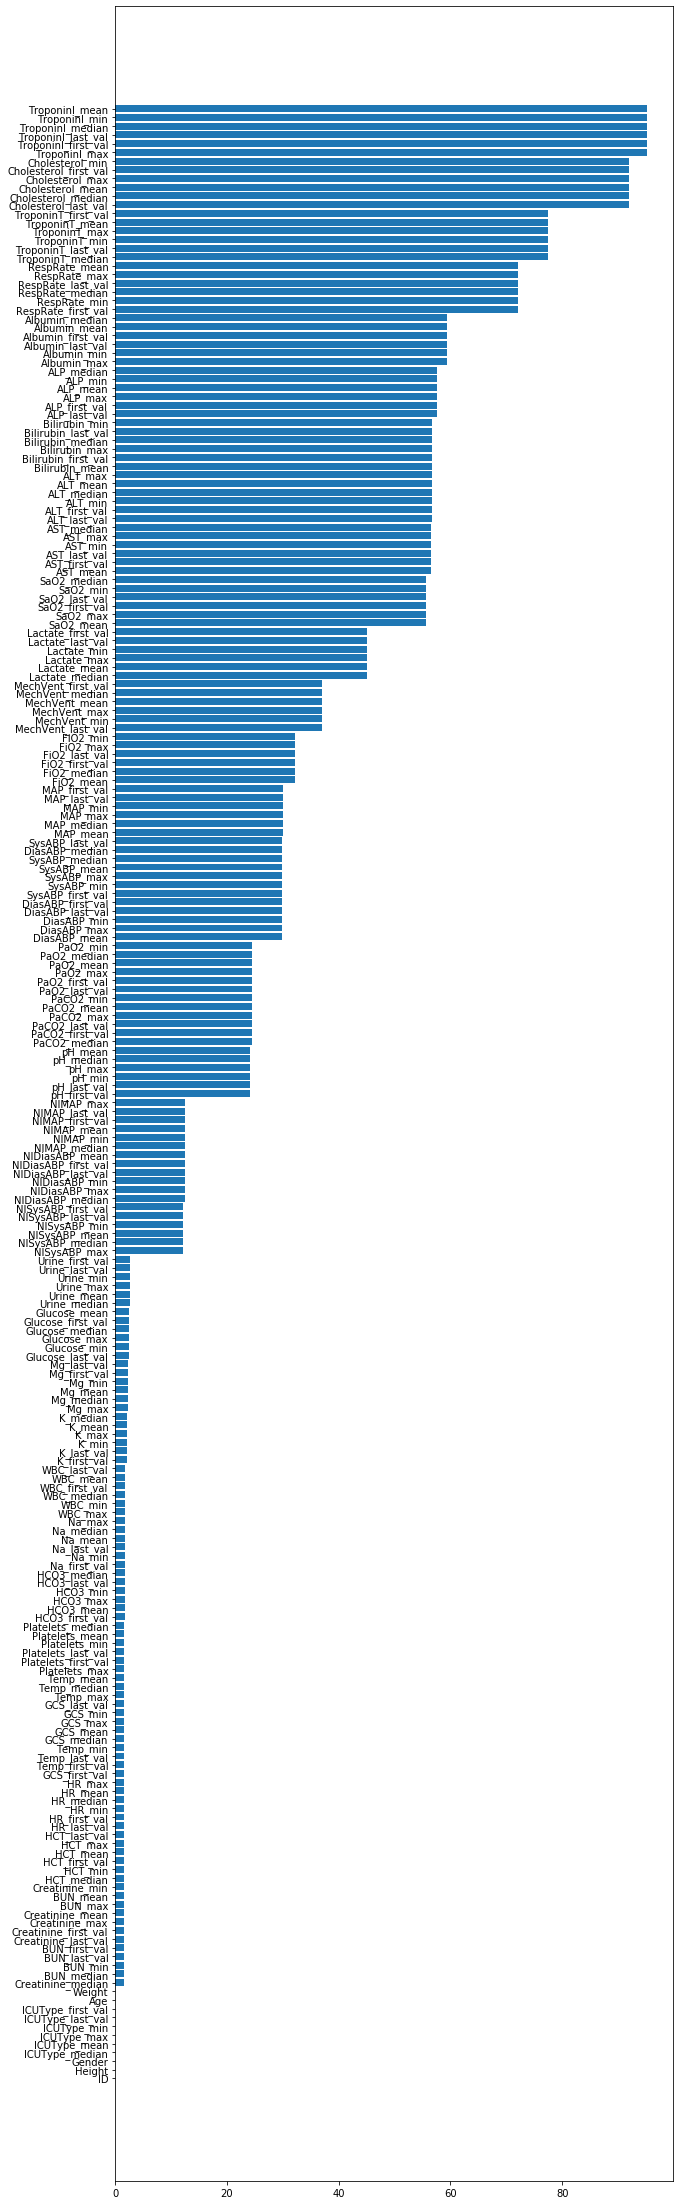

In [6]:
plt.figure(figsize=(10,40))
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

### Обработка пустых значений

Убираем сразу все колонки где большое значение пустых значений

In [7]:
colsMore50PerNull = []
for col in df.columns:
    if df[col].isnull().sum() > 3500:
        colsMore50PerNull.append(col)

In [8]:
df.drop(colsMore50PerNull, axis=1, inplace=True)

In [9]:
df.shape

(7900, 161)

In [10]:
remS = set([i[:i.find("_")] for i in df.columns if "_" in i])

In [11]:
remS

{'BUN',
 'Creatinine',
 'DiasABP',
 'FiO2',
 'GCS',
 'Glucose',
 'HCO3',
 'HCT',
 'HR',
 'ICUType',
 'K',
 'MAP',
 'MechVent',
 'Mg',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'Na',
 'PaCO2',
 'PaO2',
 'Platelets',
 'SysABP',
 'Temp',
 'Urine',
 'WBC',
 'pH'}

### Так же будем смотреть на значение mean  и median, min и max и first_val last_val. И если их средняя разница всех значений близка к нулю это значит данные столбцов не сильно отличаются друг от друга. Если это  ноль, то это значит что столбцы вообще идентичны. Такие столбцы и надо убрать 

In [12]:
meanMedDif={}
for col in remS:
    meanMedDif[col] = abs(df[col+"_mean"] - df[col+"_median"]).mean()

In [13]:
medColsDrop= []
for i in meanMedDif:
    if meanMedDif[i]<1:
        medColsDrop.append(i+"_median")

In [14]:
minMaxDif={}
for col in remS:
    minMaxDif[col] = abs(df[col+"_min"] - df[col+"_max"]).mean()

In [15]:
minColsDrop = []
for i in minMaxDif:
    if minMaxDif[i]==0:
        minColsDrop.append(i+"_min")

In [16]:
FLDif={}
for col in remS:
    FLDif[col] = abs(df[col+"_first_val"] - df[col+"_last_val"]).mean()

In [17]:
FLDrop = []
for i in FLDif:
    if FLDif[i]==0:
        FLDrop.append(i+"_first_val")

In [18]:
print(medColsDrop,minColsDrop,FLDrop)

['HCT_median', 'Creatinine_median', 'Mg_median', 'MechVent_median', 'Temp_median', 'FiO2_median', 'GCS_median', 'PaCO2_median', 'pH_median', 'Na_median', 'K_median', 'HCO3_median', 'ICUType_median', 'BUN_median', 'WBC_median'] ['MechVent_min', 'ICUType_min'] ['MechVent_first_val', 'ICUType_first_val']


In [19]:
df.drop(medColsDrop, axis=1, inplace=True)
df.drop(minColsDrop, axis=1, inplace=True)
df.drop(FLDrop, axis=1, inplace=True)

In [20]:
df.describe().append(df.isnull().sum().rename("null"))

,ID,Temp_first_val,Temp_last_val,Temp_min,Temp_max,Temp_mean,FiO2_first_val,FiO2_last_val,FiO2_min,FiO2_max,FiO2_mean,Urine_first_val,Urine_last_val,Urine_min,Urine_max,Urine_mean,Urine_median,NIDiasABP_first_val,NIDiasABP_last_val,NIDiasABP_min,NIDiasABP_max,NIDiasABP_mean,NIDiasABP_median,WBC_first_val,WBC_last_val,WBC_min,WBC_max,WBC_mean,DiasABP_first_val,DiasABP_last_val,DiasABP_min,DiasABP_max,DiasABP_mean,DiasABP_median,HCO3_first_val,HCO3_last_val,HCO3_min,HCO3_max,HCO3_mean,SysABP_first_val,SysABP_last_val,SysABP_min,SysABP_max,SysABP_mean,SysABP_median,Glucose_first_val,Glucose_last_val,Glucose_min,Glucose_max,Glucose_mean,Glucose_median,NISysABP_first_val,NISysABP_last_val,NISysABP_min,NISysABP_max,NISysABP_mean,NISysABP_median,Creatinine_first_val,Creatinine_last_val,Creatinine_min,Creatinine_max,Creatinine_mean,MechVent_last_val,MechVent_max,MechVent_mean,MAP_first_val,MAP_last_val,MAP_min,MAP_max,MAP_mean,MAP_median,Mg_first_val,Mg_last_val,Mg_min,Mg_max,Mg_mean,GCS_first_val,GCS_last_val,GCS_min,GCS_max,GCS_mean,K_first_val,K_last_val,K_min,K_max,K_mean,PaO2_first_val,PaO2_last_val,PaO2_min,PaO2_max,PaO2_mean,PaO2_median,pH_first_val,pH_last_val,pH_min,pH_max,pH_mean,PaCO2_first_val,PaCO2_last_val,PaCO2_min,PaCO2_max,PaCO2_mean,Na_first_val,Na_last_val,Na_min,Na_max,Na_mean,NIMAP_first_val,NIMAP_last_val,NIMAP_min,NIMAP_max,NIMAP_mean,NIMAP_median,HR_first_val,HR_last_val,HR_min,HR_max,HR_mean,HR_median,BUN_first_val,BUN_last_val,BUN_min,BUN_max,BUN_mean,Platelets_first_val,Platelets_last_val,Platelets_min,Platelets_max,Platelets_mean,Platelets_median,HCT_first_val,HCT_last_val,HCT_min,HCT_max,HCT_mean,ICUType_last_val,ICUType_max,ICUType_mean,Gender,Height,Age,Weight
count,7900.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,5352.000000,5352.000000,5352.000000,5352.000000,5352.000000,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,7762.000000,7762.000000,7762.000000,7762.000000,7762.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,7764.000000,7764.000000,7764.00000,7764.000000,7764.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,7701.000000,7701.000000,7701.000000,7701.000000,7701.000000,7701.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,4973.0,4973.0,4973.0,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5963.000000,5963.000000,5963.000000,5963.000000,5963.000000,7763.000000,7763.000000,7763.000000,7763.000000,7763.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7777.000000,7777.000000,7777.000000,7777.000000,7777.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000
mean,142654.630886,36.442017,36.984330,35.145105,37.923929,36.956695,0.781702,0.502268,0.442220,0.833994,0.551519,366.954622,137.884670,24.440294,610.494474,133.903498,101.513457,60.385249,57.621981,40.172957,79.409978,57.531589,56.892552,12.913096,12.239910,10.347404,16.670041,12.803374,58.979610,60.131541,40.113497,83.440816,59.622092,59.114850,23.172463,24.283874,21.84526,25.442942,23.660173,117.340491,120.976723,78.776615,158.656081,119.102785,119.013082,149.127905,128.798598,108.923646,173.349955,137.515757,133.855668,120.744554,117.877979,90.665905,143.924917,117.524957,117.424903,

Так же на статистики видно что у ICUType все значения одинаковые

In [21]:
df["ICUType"] = df["ICUType_last_val"]
df.drop(["ICUType_last_val","ICUType_max","ICUType_mean"], axis=1,inplace=True)

Там где нулл значений все еще много(1000-2000), убирать такие значения мы не будем, но оставим только среднее чтобы не захломлять данные

In [22]:
nullM1000=[]
for col in df.columns:
    if df[col].isnull().sum() > 1000:
        nullM1000.append(col)

In [23]:
f=[]
for i in nullM1000:
    if "mean" in i:
        f.append(i)

In [24]:
drop=[]
for i in nullM1000:
    if i not in f:
        drop.append(i)

In [25]:
df.drop(drop, axis=1,inplace=True)

In [26]:
df.describe().append(df.isnull().sum().rename("null"))

,ID,Temp_first_val,Temp_last_val,Temp_min,Temp_max,Temp_mean,FiO2_mean,Urine_first_val,Urine_last_val,Urine_min,Urine_max,Urine_mean,Urine_median,NIDiasABP_first_val,NIDiasABP_last_val,NIDiasABP_min,NIDiasABP_max,NIDiasABP_mean,NIDiasABP_median,WBC_first_val,WBC_last_val,WBC_min,WBC_max,WBC_mean,DiasABP_mean,HCO3_first_val,HCO3_last_val,HCO3_min,HCO3_max,HCO3_mean,SysABP_mean,Glucose_first_val,Glucose_last_val,Glucose_min,Glucose_max,Glucose_mean,Glucose_median,NISysABP_first_val,NISysABP_last_val,NISysABP_min,NISysABP_max,NISysABP_mean,NISysABP_median,Creatinine_first_val,Creatinine_last_val,Creatinine_min,Creatinine_max,Creatinine_mean,MechVent_mean,MAP_mean,Mg_first_val,Mg_last_val,Mg_min,Mg_max,Mg_mean,GCS_first_val,GCS_last_val,GCS_min,GCS_max,GCS_mean,K_first_val,K_last_val,K_min,K_max,K_mean,PaO2_mean,pH_mean,PaCO2_mean,Na_first_val,Na_last_val,Na_min,Na_max,Na_mean,NIMAP_first_val,NIMAP_last_val,NIMAP_min,NIMAP_max,NIMAP_mean,NIMAP_median,HR_first_val,HR_last_val,HR_min,HR_max,HR_mean,HR_median,BUN_first_val,BUN_last_val,BUN_min,BUN_max,BUN_mean,Platelets_first_val,Platelets_last_val,Platelets_min,Platelets_max,Platelets_mean,Platelets_median,HCT_first_val,HCT_last_val,HCT_min,HCT_max,HCT_mean,Gender,Height,Age,Weight,ICUType
count,7900.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,5352.000000,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,7762.000000,7762.000000,7762.000000,7762.000000,7762.000000,5542.000000,7764.000000,7764.000000,7764.00000,7764.000000,7764.000000,5542.000000,7701.000000,7701.000000,7701.000000,7701.000000,7701.000000,7701.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,4973.0,5529.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,5962.000000,5999.000000,5963.000000,7763.000000,7763.000000,7763.000000,7763.000000,7763.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7777.000000,7777.000000,7777.000000,7777.000000,7777.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000
mean,142654.630886,36.442017,36.984330,35.145105,37.923929,36.956695,0.551519,366.954622,137.884670,24.440294,610.494474,133.903498,101.513457,60.385249,57.621981,40.172957,79.409978,57.531589,56.892552,12.913096,12.239910,10.347404,16.670041,12.803374,59.622092,23.172463,24.283874,21.84526,25.442942,23.660173,119.102785,149.127905,128.798598,108.923646,173.349955,137.515757,133.855668,120.744554,117.877979,90.665905,143.924917,117.524957,117.424903,1.354106,1.345020,1.168397,1.538864,1.351816,1.0,81.006345,1.931564,2.046118,1.781205,2.260130,2.014850,10.100862,12.367168,8.302071,13.533771,11.641514,4.175517,4.066723,3.753466,4.554333,4.131828,147.375397,7.453460,40.330549,138.866804,138.921937,136.998325,140.797115,138.936985,79.486876,76.921859,59.475237,96.873711,76.532701,76.101742,89.683715,85.850141,68.511461,112.434294,87.184702,86.422691,25.920190,25.368976,21.941267,29.316155,25.563522,214.943251,191.580607,178.343714,232.621284,204.256575,203.139364,31.949003,30.833213,28.620882,34.128739,31.416920,0.561646,87.969671,64.450380,74.526434,2.785443
std,5860.090549,2.451318,1.608857,5.544270,0.750629,0.711905,0.132924,519.972312,156.058279,50.410771,605.328380,110.475097,109.543586,17.181120,15.165197,14.105542,19.265710,11.717169,12.169371,10.166608,7.073758,5.870785,142.151812,21.540073,10.639644,4.708234,4.267289,4.58304,4.128362,4.105853,19.971787,74.719958,43.220219,29.897776,85.252318,39.862418,37.797801,28.176818,26.027235,27.343900,27.4

In [27]:
df.shape

(7900, 106)

В статистике заметно что минимальное значение температуры какое то странное(-17), такого не может быть, поэтому тк значение температуры довольно важное, я оставлю только строки где значение минимальной температуры больше 30 

In [28]:
df = df[df["Temp_min"] >30]

In [29]:
df = df.reset_index(drop=True)

In [30]:
df.describe().append(df.isnull().sum().rename("null"))

,ID,Temp_first_val,Temp_last_val,Temp_min,Temp_max,Temp_mean,FiO2_mean,Urine_first_val,Urine_last_val,Urine_min,Urine_max,Urine_mean,Urine_median,NIDiasABP_first_val,NIDiasABP_last_val,NIDiasABP_min,NIDiasABP_max,NIDiasABP_mean,NIDiasABP_median,WBC_first_val,WBC_last_val,WBC_min,WBC_max,WBC_mean,DiasABP_mean,HCO3_first_val,HCO3_last_val,HCO3_min,HCO3_max,HCO3_mean,SysABP_mean,Glucose_first_val,Glucose_last_val,Glucose_min,Glucose_max,Glucose_mean,Glucose_median,NISysABP_first_val,NISysABP_last_val,NISysABP_min,NISysABP_max,NISysABP_mean,NISysABP_median,Creatinine_first_val,Creatinine_last_val,Creatinine_min,Creatinine_max,Creatinine_mean,MechVent_mean,MAP_mean,Mg_first_val,Mg_last_val,Mg_min,Mg_max,Mg_mean,GCS_first_val,GCS_last_val,GCS_min,GCS_max,GCS_mean,K_first_val,K_last_val,K_min,K_max,K_mean,PaO2_mean,pH_mean,PaCO2_mean,Na_first_val,Na_last_val,Na_min,Na_max,Na_mean,NIMAP_first_val,NIMAP_last_val,NIMAP_min,NIMAP_max,NIMAP_mean,NIMAP_median,HR_first_val,HR_last_val,HR_min,HR_max,HR_mean,HR_median,BUN_first_val,BUN_last_val,BUN_min,BUN_max,BUN_mean,Platelets_first_val,Platelets_last_val,Platelets_min,Platelets_max,Platelets_mean,Platelets_median,HCT_first_val,HCT_last_val,HCT_min,HCT_max,HCT_mean,Gender,Height,Age,Weight,ICUType
count,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,5244.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,5420.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,5420.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,6803.000000,6803.000000,6803.000000,6803.000000,6803.000000,6803.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,4862.0,5406.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,5785.000000,5821.000000,5785.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7507.000000,7507.000000,7507.000000,7507.000000,7507.000000,7507.000000,7512.000000,7512.000000,7512.000000,7512.000000,7512.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000
mean,142674.278383,36.566321,37.028455,35.891915,37.922181,37.003511,0.551260,368.495159,138.009948,24.453814,612.220321,133.991422,101.491312,60.407703,57.647779,40.220304,79.419655,57.551722,56.910432,12.929531,12.241803,10.357281,16.737186,12.820436,59.624634,23.170800,24.285200,21.849280,25.440800,23.660266,119.110714,149.294489,128.989382,109.104973,173.359409,137.645587,133.989247,120.715412,117.868007,90.840813,143.858129,117.544324,117.446531,1.354564,1.342988,1.167190,1.538278,1.350906,1.0,81.025759,1.931258,2.047625,1.781178,2.260719,2.015295,10.110251,12.388109,8.321302,13.543510,11.656974,4.177517,4.067100,3.754339,4.554928,4.132038,147.595304,7.455840,40.312935,138.842379,138.896386,136.978397,140.771169,138.912909,79.482063,76.928377,59.542407,96.863498,76.539336,76.107582,89.628849,85.864943,68.524885,112.371597,87.170903,86.413899,25.912853,25.346062,21.928419,29.301224,25.551174,214.968163,191.534155,178.368856,232.620221,204.262601,203.115426,31.980005,30.832575,28.638671,34.148762,31.431233,0.561229,89.090747,64.493766,75.720524,2.785011
std,5861.250462,1.041887,0.733362,0.780612,0.751991,0.572385,0.132877,523.439474,156.197437,50.496230,608.670041,110.958054,110.055564,17.203194,15.181392,14.077969,19.288428,11.731278,12.187969,10.208815,7.002627,5.811787,144.609481,21.854180,10.649425,4.709712,4.261629,4.582482,4.130856,4.105961,20.023458,74.920297,43.393739,29.920406,84.980382,39.893019,37.867215,28.131252,26.029690,27.122099,2

In [31]:
df = df.fillna(-1)
#df = df.fillna(df.median())

Разделим колонки на 5 частей для красивой визуализации

In [32]:
splitCols = []
for i in range(5):
    splitCols.append(list(df.columns[(i*21)+1:((i+1)*21)+1]))

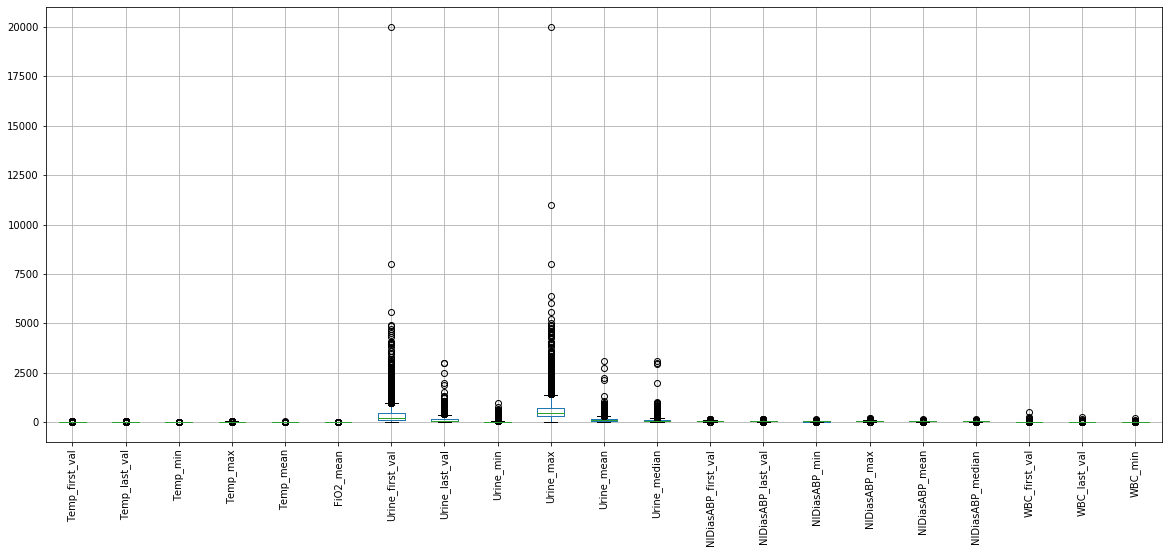

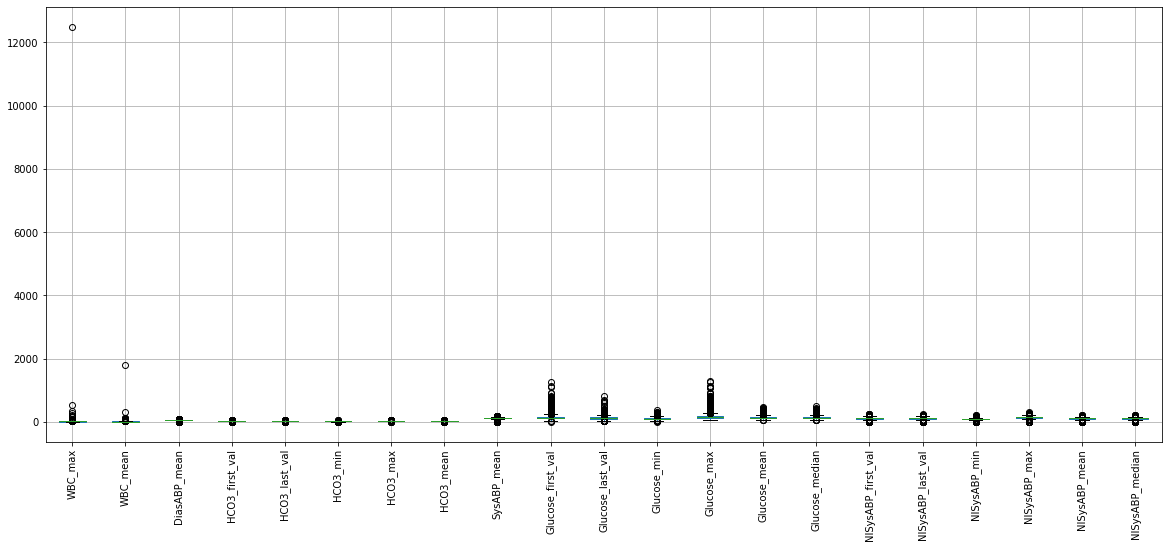

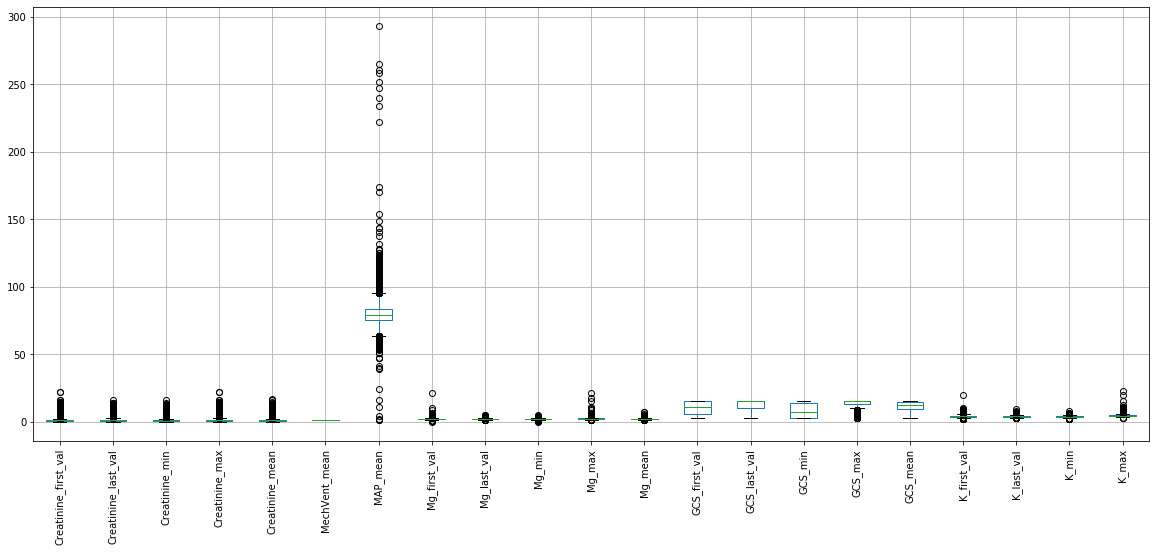

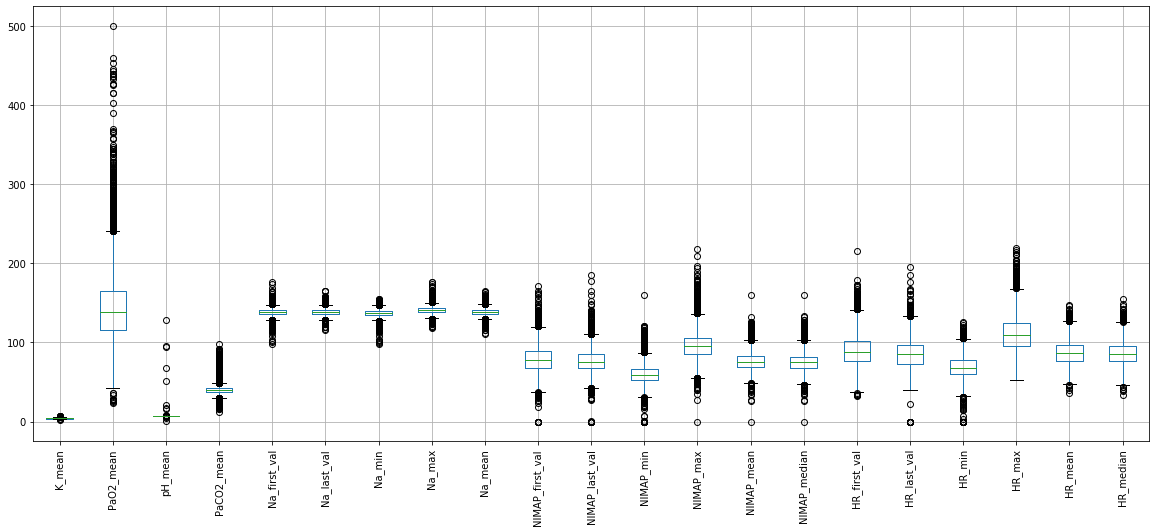

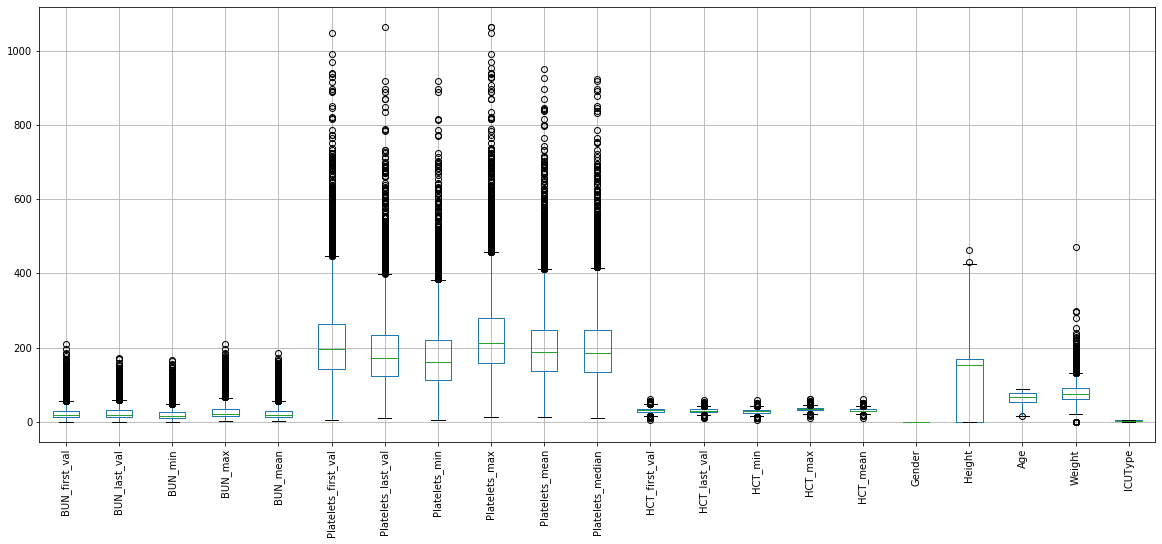

In [33]:
for i in splitCols:
    plt.figure(figsize=(20,8))
    df[i].boxplot(rot=90)

#### Из графиков видно что сильные отклонения(значения близкие к 2000) от нормы есть в этих столбцах `'Urine_first_val', 'Urine_max', "WBC_max", "WBC_mean"`

In [34]:
anomaly=[ 'Urine_first_val',
 'Urine_max',
   "WBC_max",
   "WBC_mean"]

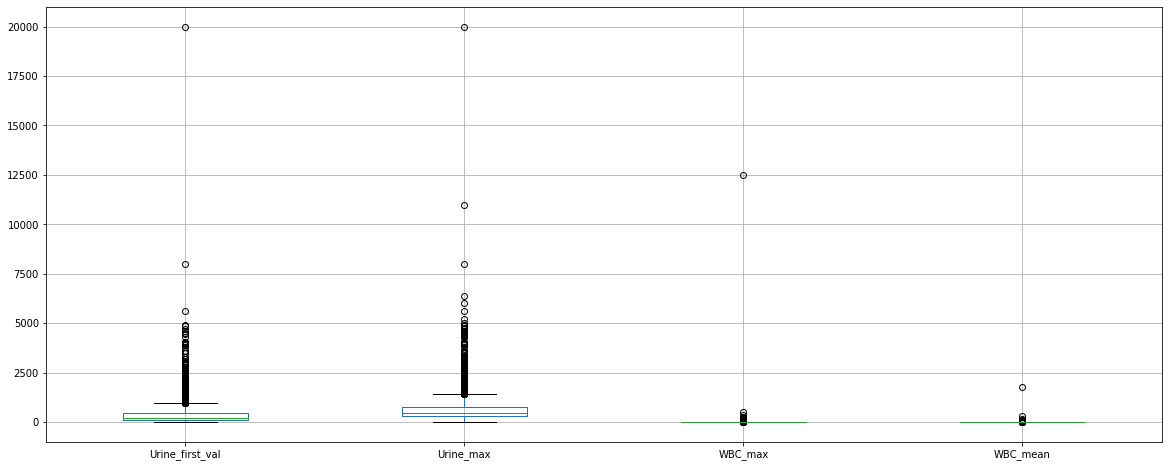

In [35]:
plt.figure(figsize=(20,8))
df[anomaly].boxplot()

Уберем верхние значения 

In [36]:
for _ in range(5):
    rowDrop=[]
    for col in anomaly:
        rowDrop.append(df[col].idxmax())
    rowDrop = list(set(rowDrop))
    print(rowDrop)
    df = df.drop(rowDrop, axis=0)
    df = df.reset_index(drop=True)
        
        
        

[6459, 7524]
[3784, 2937, 6525]
[6320, 5759, 247, 2415]
[7331, 5044, 7267]
[4472, 4737, 3300, 782]


Как видно все значения находятся в одном диапазоне и никаких сильных выбросов нет

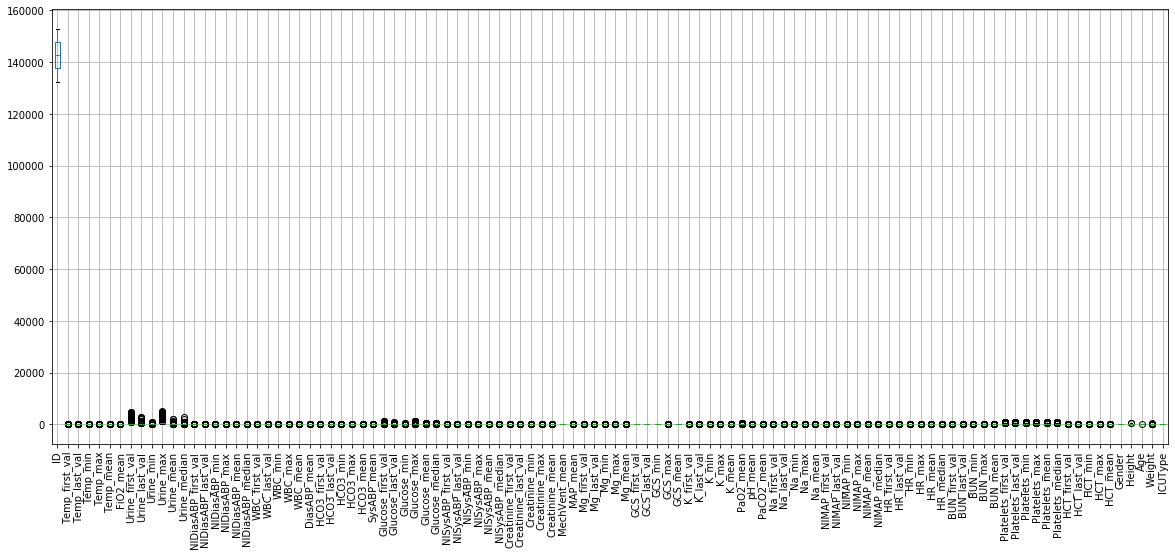

In [37]:
plt.figure(figsize=(20,8))
df.boxplot(rot=90)

In [38]:
df.describe().append(df.isnull().sum().rename("null"))

,ID,Temp_first_val,Temp_last_val,Temp_min,Temp_max,Temp_mean,FiO2_mean,Urine_first_val,Urine_last_val,Urine_min,Urine_max,Urine_mean,Urine_median,NIDiasABP_first_val,NIDiasABP_last_val,NIDiasABP_min,NIDiasABP_max,NIDiasABP_mean,NIDiasABP_median,WBC_first_val,WBC_last_val,WBC_min,WBC_max,WBC_mean,DiasABP_mean,HCO3_first_val,HCO3_last_val,HCO3_min,HCO3_max,HCO3_mean,SysABP_mean,Glucose_first_val,Glucose_last_val,Glucose_min,Glucose_max,Glucose_mean,Glucose_median,NISysABP_first_val,NISysABP_last_val,NISysABP_min,NISysABP_max,NISysABP_mean,NISysABP_median,Creatinine_first_val,Creatinine_last_val,Creatinine_min,Creatinine_max,Creatinine_mean,MechVent_mean,MAP_mean,Mg_first_val,Mg_last_val,Mg_min,Mg_max,Mg_mean,GCS_first_val,GCS_last_val,GCS_min,GCS_max,GCS_mean,K_first_val,K_last_val,K_min,K_max,K_mean,PaO2_mean,pH_mean,PaCO2_mean,Na_first_val,Na_last_val,Na_min,Na_max,Na_mean,NIMAP_first_val,NIMAP_last_val,NIMAP_min,NIMAP_max,NIMAP_mean,NIMAP_median,HR_first_val,HR_last_val,HR_min,HR_max,HR_mean,HR_median,BUN_first_val,BUN_last_val,BUN_min,BUN_max,BUN_mean,Platelets_first_val,Platelets_last_val,Platelets_min,Platelets_max,Platelets_mean,Platelets_median,HCT_first_val,HCT_last_val,HCT_min,HCT_max,HCT_mean,Gender,Height,Age,Weight,ICUType
count,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.00000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.0,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.00000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000,7603.000000
mean,142669.359200,36.566171,37.028186,35.892056,37.921952,37.003567,0.543588,361.421281,137.103380,24.318993,601.972905,132.765547,100.468631,60.257004,57.45824,40.189267,79.383007,57.451895,56.806392,12.726009,12.149675,10.291523,14.833258,12.455517,59.393303,23.166908,24.279890,21.849875,25.431935,23.658801,118.546672,148.922531,128.803630,109.048402,172.834934,137.453913,133.809878,120.655130,117.789563,90.978962,143.681553,117.370526,117.196995,1.348928,1.337775,1.162896,1.531685,1.345820,1.0,80.419286,1.931014,2.046376,1.782086,2.259266,2.014640,10.113245,12.395239,8.325529,13.548994,11.662560,4.176325,4.065619,3.753624,4.55194,4.130964,145.219166,7.439938,40.168532,138.843614,138.888991,136.977509,140.765356,138.908038,79.325792,76.746515,59.439632,96.778533,76.400247,75.947974,89.611495,85.850717,68.509943,112.361463,87.160588,86.405629,25.831382,25.270420,21.859398,29.215047,25.474549,214.606471,191.302631,178.175326,232.227805,204.007213,202.875970,31.980376,30.831159,28.638577,34.143680,31.426483,0.561094,89.030672,64.517559,75.720593,2.784559
std,5860.193587,1.041886,0.733551,0.780845,0.752093,0.572727,0.110797,452.235473,153.221703,50.266269,526.891771,99.793885,98.702966,16.238228,14.32558,13.273868,18.194738,11.064822,11.495100,6.812244,5.908195,5.117991,7.334869,5.883430,8.995010,4.674363,4.227551,4.547805,4.098137,4.073780,16.922323,74.135388,42.913773,29.582160,84.060894,39.432967,37.404908,26.598215,24.573139,25.603577,25.986373,18.

#### В этой сессии мы убрали колонки с большим количеством пустых значений, убрали колонки с близкими значениями, убрали аномали температуры, и сильные выбросы несоответствующие норме

In [39]:
df.to_csv("clear_data.csv")
#df.to_csv("clear_data_median_fill.csv")